In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("talk", rc={"figure.figsize": (12, 8)}, font_scale=1.5)
pd.set_option("max_rows", 10)
np.set_printoptions(suppress=True)

In this blog post, we will look at the coin flip problem in a bayesian point of view. Most of this information is already widely available through the web, but I want to write it up anyways, so I can go into more involved bayesian concepts in future posts.

## Likelihood

Lets say we flip a coin, and get $h$ heads and $t$ tails, the probability follows a <a href="https://en.wikipedia.org/wiki/Binomial_distribution" target="_blank">binomial distribution</a>:

$$
P(D|\theta) = {_{h+t}}C_{h}\theta^{h}(1-\theta)^{t}
$$

where $D$ is the event of getting $h$ heads and $t$ tails, $\theta$ is the probability of heads, and $1-\theta$ is the probability of tails. Let say we want to flip the conditional probability using Bayes' theorem:

$$
P(\theta|D) = \dfrac{P(D|\theta)P(\theta)}{P(D)}
$$

**Why do we want to write the conditional probability this way?**

The conditional probability, $P(\theta|D)$, treats the probability of heads, $\theta$, as a random variable. It is the probability of $\theta$, given that we observed the event $D$. To make speaking of these probabilies easier they are given names:

- $P(\theta)$: the prior
- $P(\theta|D)$: the posterior
- $P(D|\theta)$: the likelihood

For example, lets say we flipped some coins and observed 3 heads and 5 tails, ($D$ is the event of 3 heads and 5 tails), the posterior allows us to obtain the probabilities of $P(\theta=0.1|D)$ or $P(\theta=0.7|D)$, etc. The posterior givens us probabilities for all possible values of $\theta$ (the probability of heads).

## Prior

Next, lets look at the prior, $P(\theta)$, this is the probability of $\theta$ before any coin flips. In other words, this is the measure of the belief *before* we perform the experiment. For the coin flipping example, we normally come across coins that have $\theta=0.5$, so our prior should center around 0.5. For now, lets pick a <a href="https://en.wikipedia.org/wiki/Beta_distribution" target="_blank">beta distribution</a> with $\alpha=2$ and $\beta=2$ as our prior:

$$
P(\theta) = \dfrac{1}{B(\alpha,\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}
$$

where $B(\alpha, \beta)$ is the <a href="https://en.wikipedia.org/wiki/Beta_function" target="_blank">Beta Function</a>. This prior is centered at 0.5 and is lower for all other values. Let's graph the beta prior distribution:

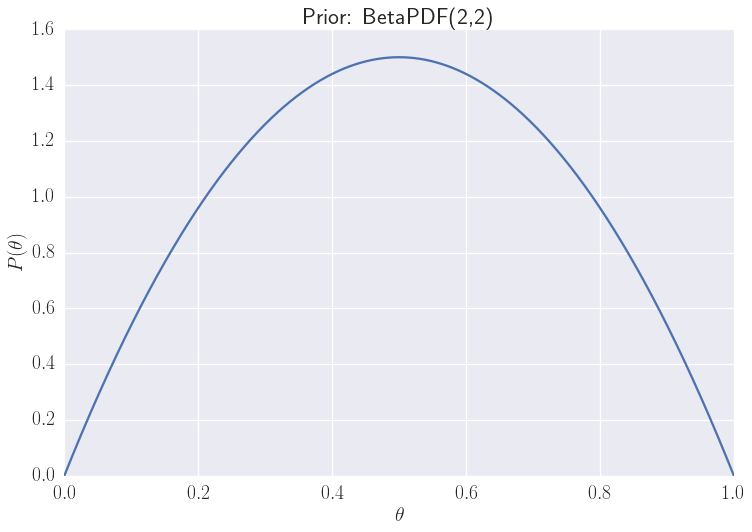

In [4]:
# <!-- collapse=True -->

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# configure style
mpl.rc('text', usetex=True)
mpl.rc('font', size=26)
sns.set_style("darkgrid")
sns.set_context("talk", rc={"figure.figsize": (12, 8)}, font_scale=1.5)
current_palette = sns.color_palette()

def plot_prior(alpha, beta, ax=None):
    x = np.linspace(0, 1, 1000)
    y = scipy.stats.beta.pdf(x, alpha, beta)

    if not ax:
        fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(r"$\theta$", fontsize=20)
    ax.set_ylabel(r"$P(\theta)$", fontsize=20)
    ax.set_title("Prior: BetaPDF({},{})".format(alpha,beta));
    
plot_prior(alpha=2, beta=2)

The maximum of our prior is centered at 0.5 and is lower for other values. This means that we normally see coins which are fair, but do not rule out that there is a chance that the coin could be unfair.

## P(D)

The last thing we need to get the posterior is the denominator of bayes theorem, $P(D)$, which is the probability of the event happening. In general, this is calculated by integrating over all the possible values of $\theta$:

$$
P(D) = \int_0^1 P(D|\theta)P(\theta)d\theta
$$

Normally this integral would not be possible to do analytically, but since our prior is a beta distribution and our likelihood is a binomial distribution, this integral would be worked out to be:

$$
P(D) = {_{h+t}}C_{h}\dfrac{B(h+\alpha, t+\beta)}{B(\alpha, \beta)}
$$

For other priors, the integral would not be able to be computed, and other techniques are used to get the posterior, which I will get into in a future blog post.

## Putting it together

Putting $P(D)$, the prior, and likelihood together into Bayes' theorem to get the posterior:
$$
P(\theta|D) = \dfrac{1}{B(h+\alpha, t+\beta)}\theta^{h+\alpha-1}(1-\theta)^{t+\alpha-1}
$$

## Example

Recall, for our example, $\alpha=2$ and $\beta=2$, thus posterior becomes:

$$
P(\theta|D) = \dfrac{1}{B(h+2, t+2)}\theta^{h+1}(1-\theta)^{t+1}
$$

Let's say create function in python to plot the posterior:

In [5]:
def plot_posterior(heads, tails, alpha, beta, ax=None):
    x = np.linspace(0, 1, 1000)
    y = scipy.stats.beta.pdf(x, heads+alpha, tails+beta)
        
    if not ax:
        fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(r"$\theta$", fontsize=20)
    ax.set_ylabel(r"$P(\theta|D)$", fontsize=20)
    ax.set_title("Posterior after {} heads, {} tails, \
                 Prior: BetaPDF({},{})".format(heads, tails, alpha, beta));

Lets say we flipped the coin 17 times and observed 5 heads and 12 tails, our posterior becomes:

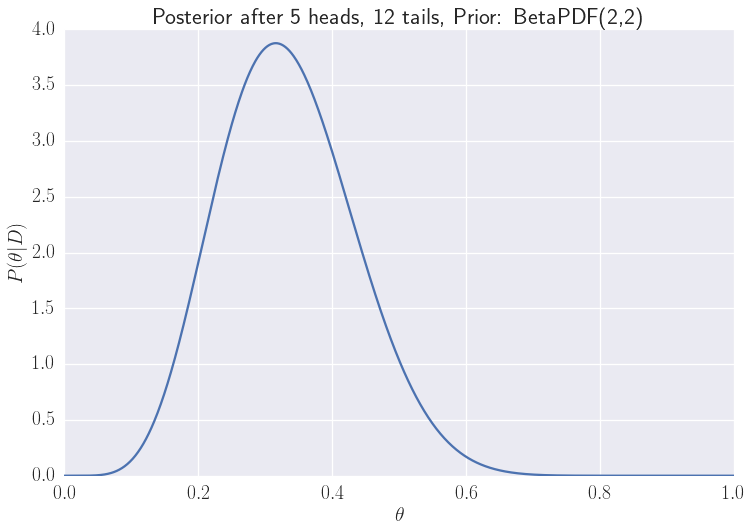

In [6]:
plot_posterior(heads=5, tails=12, alpha=2, beta=2)

With 5 heads and 12 tails, our belief of the possible values of $\theta$ shifts to the left, suggesting that $\theta$ is more likely to be lower than $0.5$. Now lets say we flipped 75 times and observed 50 heads and 25 tails:

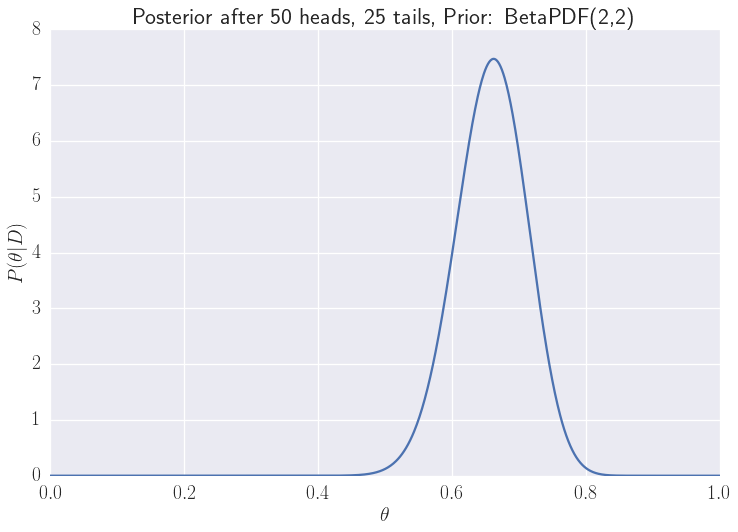

In [7]:
plot_posterior(heads=50, tails=25, alpha=2, beta=2)

With that many heads, the posterior shifts to the right, implying that $\theta$ is higher. Notice that the distrubution for 75 flips is narrower than the 17 times. With 75 flips, we have a clearer picture of what the value of $\theta$ should be.

## Different Priors

**What would happen when we choose other priors?**

We'll explore how to handle non-beta priors in a future blog post. Right now, lets look at what happens when we choose different beta priors. Lets say we come from a world where coins are not 50-50, but are biased toward a bigger $\theta$:

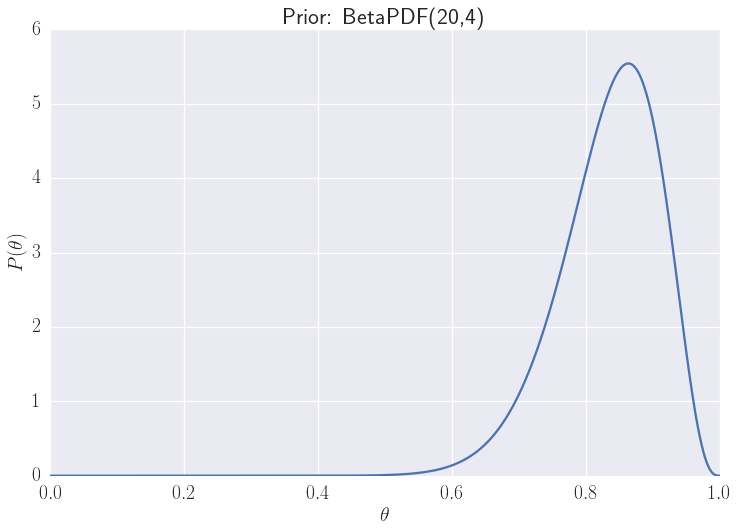

In [27]:
plot_prior(alpha=20, beta=4)

Let's see what happens to the posterior when we flip a coin and get:

- 4 heads 5 tails
- 20 heads 20 tails
- 50 heads 49 tails
- 75 heads 74 tails
- 400 heads 399 tails

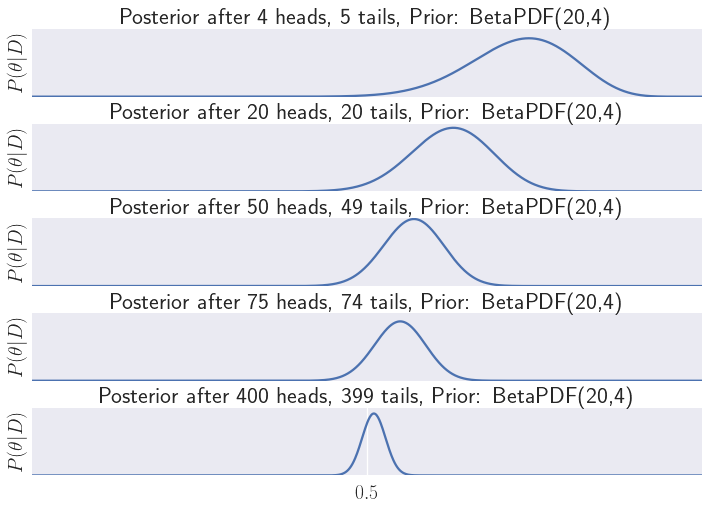

In [30]:
fig, axes = plt.subplots(5)
flips = [(4, 5), (20, 20), (50, 49), (75, 74), (400, 399)]
for i, flip in enumerate(flips):
    plot_posterior(heads=flip[0], tails=flip[1], alpha=20, beta=4, ax=axes[i])
    axes[i].set_yticks([])
fig.subplots_adjust(hspace=0.4)
for ax in axes:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel("")
axes[4].set_xticks([0.5]);

When we only flip 9 coins in the first case, our belief does not change much and is still skewed. But as we flip more coins and get an 50-50 distrubution of heads and tails, our belief changes to a distrubution around $\theta=0.5$, i.e. a fair coin. Since our prior was so skewed, even with 400 heads and 399 tails, the peak of the posterior distrubution is still not 0.5.

## Closing

In the next post, we will look at what happens when we have a non-beta prior, and use priors that are more strange. Specifically, we will look at situations where $P(D)$ can not be solve analytically, and must switch to other methods to obtain the posterior distrubution.